In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from scipy.stats import chi2

# to read mzML files
from pyteomics import mzml

# to visualize MS/MS and obtain ground truth
from pyteomics import pylab_aux as pa
from pyteomics import mass

# to find peaks
from scipy.signal import find_peaks

In [2]:
m_df = pd.read_csv("../data/PSM_df.csv")

In [20]:
m_df[m_df["Peptide"] == "AAAAAATAAAAASIR"]#["m/z array"]

,Spectrum,Peptide,Hyperscore
1043,"{'index': 19954, 'id': 'controllerType=0 contr...",AAAAAATAAAAASIR,43.184


In [619]:
m_df.head()

,Spectrum,Peptide,Hyperscore
0,"{'index': 24168, 'id': 'controllerType=0 contr...",VIHDNFGIVEGLMTTVHAITATQK,95.553
1,"{'index': 16758, 'id': 'controllerType=0 contr...",KDLYANTVLSGGTTMYPGIADR,85.386
2,"{'index': 20733, 'id': 'controllerType=0 contr...",SGDAAIVDMVPGKPMCVESFSDYPPLGR,80.330
3,"{'index': 29352, 'id': 'controllerType=0 contr...",DLGEELEALKTELEDTLDSTAAQQELR,80.242
4,"{'index': 26551, 'id': 'controllerType=0 contr...",DGAGFLINLIDSPGHVDFSSEVTAALR,78.583


In [5]:
def I_to_L(sequence):
    for i in range(len(sequence)):
        if sequence[i] == "I":
            new_seq = [char for char in sequence]
            new_seq[i] = "L"
            sequence = "".join(new_seq)
    return sequence

In [620]:
m_df["Peptide"] = [I_to_L(x) for x in m_df["Peptide"]]

In [3]:
import os
os.listdir("../habrok_output")

['ADEGISFR_fits.csv',
 'AFMTADLPNELIELLEK_fits.csv',
 'AFVHWYVGEGMEEGEFSEAR_fits.csv',
 'AGKPVICATQMLESMIK_fits.csv',
 'AGLEVLFASAAPAITCR_fits.csv',
 'AHQNTLEVYPPFLFFLAVGGVYHPR_fits.csv',
 'AIELLQEFSDQHPENAAEIK_fits.csv',
 'AILVDLEPGTMDSVR_fits.csv',
 'ALQEGEGDLSISADR_fits.csv',
 'AMQEQLENYDFTK_fits.csv',
 'ANLQIDQINTDLNLER_fits.csv',
 'ASINMLR_fits.csv',
 'ASVITQVFHVPLEER_fits.csv',
 'ATEMVEVGADDDEGGAER_fits.csv',
 'AVENGSEALMILDDQTNK_fits.csv',
 'CAIALWFTLDPR_fits.csv',
 'CGEMAQAASAAVTR_fits.csv',
 'CVAVGPGGYAVVVCIGQIVLLK_fits.csv',
 'DILETHLR_fits.csv',
 'DMFQETMEAMR_fits.csv',
 'DNTIEHLLPLFLAQLK_fits.csv',
 'DYFNVPYPLPK_fits.csv',
 'DYLHLPPEIVPATLR_fits.csv',
 'EDEDDKTVLDLAVVLFETATLR_fits.csv',
 'EGIILFK_fits.csv',
 'EGLVMVEVR_fits.csv',
 'ENLISALEEAK_fits.csv',
 'ESQISAEIELLPTNDK_fits.csv',
 'ESYYQLMK_fits.csv',
 'EVVKPVPITSPAVSK_fits.csv',
 'FDDDKVSIVTPEDILR_fits.csv',
 'FEAHPNDLYVEGLPENIPFR_fits.csv',
 'FEVNISELPDEIDISSYIEQTR_fits.csv',
 'FHDFLGDSWGILFSHPR_fits.csv',
 'FLIPNASQA

In [6]:
multi_pep = {}
for file_name in os.listdir("../habrok_output"):
    multi_pep[I_to_L(file_name.replace("_fits.csv",""))] = pd.read_csv(f"../habrok_output/{file_name}")

In [276]:
multi_pep.keys()

dict_keys(['ADEGLSFR', 'AFMTADLPNELLELLEK', 'AFVHWYVGEGMEEGEFSEAR', 'AGKPVLCATQMLESMLK', 'AGLEVLFASAAPALTCR', 'AHQNTLEVYPPFLFFLAVGGVYHPR', 'ALELLQEFSDQHPENAAELK', 'ALLVDLEPGTMDSVR', 'ALQEGEGDLSLSADR', 'AMQEQLENYDFTK', 'ANLQLDQLNTDLNLER', 'ASLNMLR', 'ASVLTQVFHVPLEER', 'ATEMVEVGADDDEGGAER', 'AVENGSEALMLLDDQTNK', 'CALALWFTLDPR', 'CGEMAQAASAAVTR', 'CVAVGPGGYAVVVCLGQLVLLK', 'DLLETHLR', 'DMFQETMEAMR', 'DNTLEHLLPLFLAQLK', 'DYFNVPYPLPK', 'DYLHLPPELVPATLR', 'EDEDDKTVLDLAVVLFETATLR', 'EGLLLFK', 'EGLVMVEVR', 'ENLLSALEEAK', 'ESQLSAELELLPTNDK', 'ESYYQLMK', 'EVVKPVPLTSPAVSK', 'FDDDKVSLVTPEDLLR', 'FEAHPNDLYVEGLPENLPFR', 'FEVNLSELPDELDLSSYLEQTR', 'FHDFLGDSWGLLFSHPR', 'FLLPNASQAESK', 'FSVCVLGDQQHCDEAK', 'FVTVQTLSGTGALR', 'GDLENAFLNLVQCLQNKPLYFADR', 'GFFDPNTHENLTYLQLLER', 'GLLAADESTGSLAK', 'GMYGLENEVFLSLPCLLNAR', 'GQNDLMGTAEDFADQFLR', 'GTAVFWYNLLR', 'GYTSWALGLSVADLAESLMK', 'HLDHVAALFPGDVDR', 'LAAELAQAEEQAR', 'LDDPTDSKPEDWDKPEHLPDPDAK', 'LFQNLDGALDEVVLK', 'LFVGLCQVGAWGCFDEFNR', 'LGGLGTVPVGR', 'LHYFDPQYFE

C:\Users\TheSh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\indexes\base.py:945: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


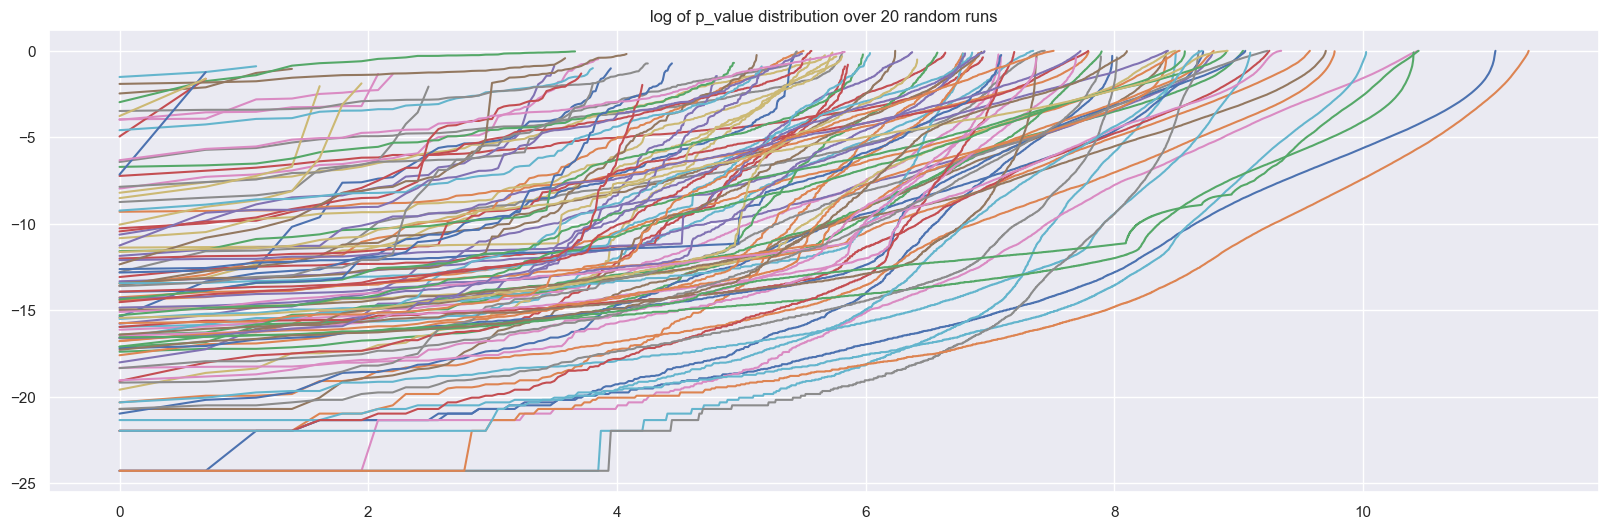

In [7]:
# p-value of 20 peptides

sns.set_theme(rc={'figure.figsize':(20,6)})
plt.title("log of p_value distribution over 20 random runs")

i = 0
for entry in multi_pep:
    print(i)
    x = np.log(multi_pep[entry].index)
    y = np.log(multi_pep[entry]["combined_p"])
    i += 1
    plt. xscale('log')
    plt. yscale('log')
    plt.plot(x,y)

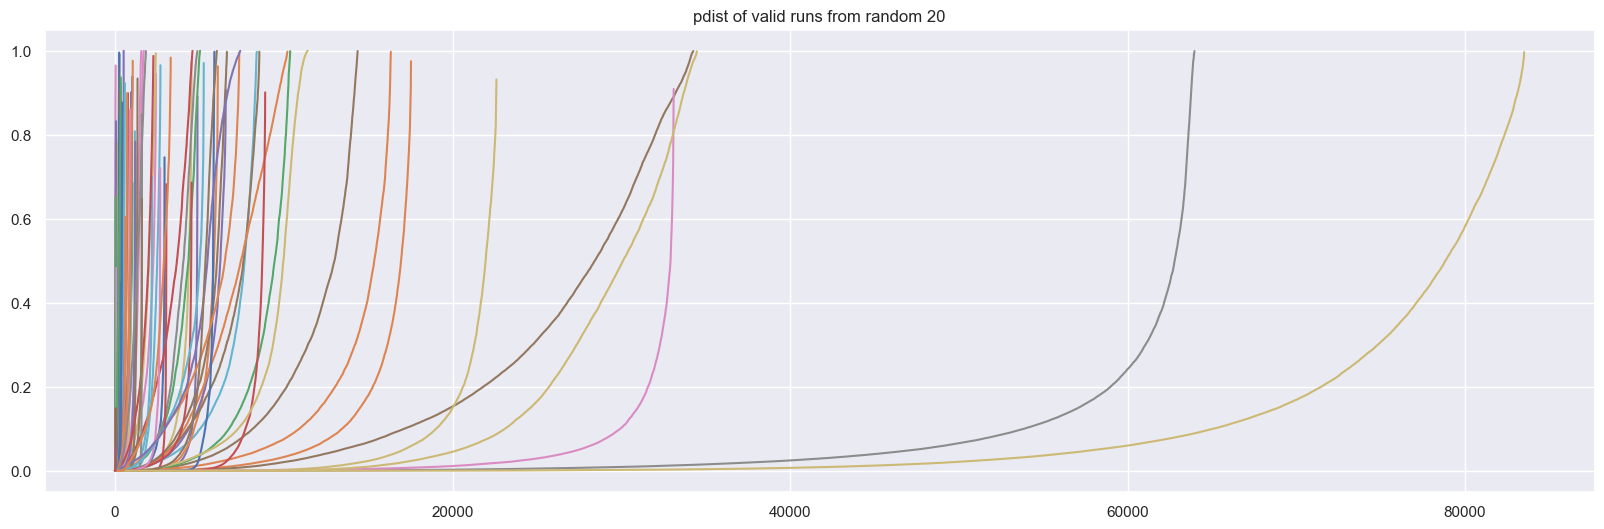

In [278]:
plt.title("pdist of valid runs from random 20")

for entry in multi_pep:
    x = multi_pep[entry].index
    y = multi_pep[entry]["combined_p"]
    if len(x) > 10:
        plt.plot(x,y)
    #plt.xlim(-100,4000)

In [44]:
m_df[m_df["Peptide"]== peppi]

,Spectrum,Peptide,Hyperscore
171,"{'index': 18187, 'id': 'controllerType=0 contr...",AFVHWYVGEGMEEGEFSEAR,56.228
208,"{'index': 18360, 'id': 'controllerType=0 contr...",AFVHWYVGEGMEEGEFSEAR,55.072
348,"{'index': 18162, 'id': 'controllerType=0 contr...",AFVHWYVGEGMEEGEFSEAR,51.192
1456,"{'index': 18052, 'id': 'controllerType=0 contr...",AFVHWYVGEGMEEGEFSEAR,40.363
1478,"{'index': 16486, 'id': 'controllerType=0 contr...",AFVHWYVGEGMEEGEFSEAR,40.249
1943,"{'index': 18700, 'id': 'controllerType=0 contr...",AFVHWYVGEGMEEGEFSEAR,37.737
2932,"{'index': 16556, 'id': 'controllerType=0 contr...",AFVHWYVGEGMEEGEFSEAR,33.790


In [169]:
top_20_string = (list(multi_pep.values())[0]["sequence"][0:20].values)

In [181]:
"".join(eval(top_20_string[16]))

'ADEAVSFR'

In [171]:
list(multi_pep)[0]

'ADEGISFR'

In [808]:
multi_pep_stats = {}
top_1_pep_stats = {}
for real_peptide, entry in zip(multi_pep,multi_pep.values()):
    real_peptide = I_to_L(real_peptide)
    entry["prob_of_outcome"] = entry["combined_p"] / np.sum(
        entry["combined_p"])
    entropy_of_sample = - np.sum(
        entry["prob_of_outcome"] * np.log2(entry["prob_of_outcome"]))
    multi_pep_stats[real_peptide] = {"entropy": entropy_of_sample}
    top_1_pep_stats[real_peptide] = {"entropy": entropy_of_sample}



In [809]:
import difflib
def get_overlap(s1, s2):
    s = difflib.SequenceMatcher(None, s1, s2)
    pos_a, pos_b, size = s.find_longest_match(0, len(s1), 0, len(s2))
    return s1[pos_a:pos_a+size]

s1 = "".join(eval(top_20_string[5]))
s2 = list(multi_pep)[1]

print(get_overlap(s1, s2))

AD


In [810]:
import difflib

def get_all_overlaps(s1, s2, min_len=3):
    matcher = difflib.SequenceMatcher(None, s1, s2)
    matches = matcher.get_matching_blocks()

    # Extract all non-trivial (length >= min_len) matching substrings
    overlaps = []
    for match in matches:
        a, b, size = match
        if size >= min_len:
            overlap = s1[a:a+size]  # could also use s2[b:b+size]
            overlaps.append(overlap)

    return overlaps


In [811]:
s1 = 'ADEAVSFR'
s2 = 'ADEGISFR'

overlaps = get_all_overlaps(s1, s2, min_len=3)
for i, o in enumerate(overlaps, 1):
    print(f"{i}. {o}")

overlaps


1. ADE
2. SFR


['ADE', 'SFR']

In [812]:
def find_overlap_in_top1():
    print("yurp")
    all_overlaps = {}
    for real_peptide, entry in zip(multi_pep,multi_pep.values()):
        sequence = entry["sequence"][0]
        overlap_list = []
        found_peptide = "".join(eval(sequence))
        #print(found_peptide)
        # print(real_peptide)
        overlap = get_all_overlaps(real_peptide, found_peptide, min_len=3)
        overlap_list.append(overlap)
        joined_overlaps = ["".join(ind_overlaps) for ind_overlaps in overlap_list]
        longest_overlap = max(joined_overlaps,key=len)
        longest_overlap_index = joined_overlaps.index(longest_overlap)
        # print(overlap_list)
        longest_overlap_len = len("".join(overlap_list[longest_overlap_index]))
        #print((eval(top_20[longest_overlap_index])))
        #print(len(real_peptide))
        #print(real_peptide)len("".join(overlap_list[longest_overlap_index]))
        top_1_pep_stats[real_peptide]["overlaps"] = overlap_list
        if longest_overlap_len > 0:
            top_1_pep_stats[real_peptide]["longest_overlap_pep"] = (
                (sequence)
            )
            top_1_pep_stats[real_peptide]["longest_overlap"] = overlap_list[longest_overlap_index]
        elif longest_overlap_len == 0:
            top_1_pep_stats[real_peptide]["longest_overlap_pep"] = []
            top_1_pep_stats[real_peptide]["longest_overlap"] = []
        top_1_pep_stats[real_peptide]["longest_overlap_len"] = longest_overlap_len
        top_1_pep_stats[real_peptide]["real_pep_len"] = len(real_peptide)
        top_1_pep_stats[real_peptide]["real_peptide"] = real_peptide
        top_1_pep_stats[real_peptide]["longest_overlap_perc"] = longest_overlap_len/ len(real_peptide)
        top_1_pep_stats[real_peptide]["combined_p"] = multi_pep[real_peptide]["combined_p"].values[0]

In [813]:
multi_pep["ADEGLSFR"]["combined_p"].values[0]

2.8631021115928584e-11

In [814]:
find_overlap_in_top1()

yurp


In [815]:
def find_overlaps_in_top_n(n):
    print("yurp")
    all_overlaps = {}
    for real_peptide, entry in zip(multi_pep,multi_pep.values()):
        top_n = entry["sequence"][0:n].values
        overlap_list = []
        combined_p_list = []
        for sequence in top_n:
            found_peptide = "".join(eval(sequence))
            #print(found_peptide)
            # print(real_peptide)
            overlap = get_all_overlaps(real_peptide, found_peptide, min_len=3)
            overlap_list.append(overlap)
            combined_p_list.append(entry[entry["sequence"]== sequence]["combined_p"])
        joined_overlaps = ["".join(ind_overlaps) for ind_overlaps in overlap_list]
        longest_overlap = max(joined_overlaps,key=len)
        longest_overlap_index = joined_overlaps.index(longest_overlap)
        # print(overlap_list)
        longest_overlap_len = len("".join(overlap_list[longest_overlap_index]))
        #print((eval(top_n[longest_overlap_index])))
        #print(len(real_peptide))
        #print(real_peptide)len("".join(overlap_list[longest_overlap_index]))
        multi_pep_stats[real_peptide]["overlaps"] = overlap_list
        if longest_overlap_len > 0:
            multi_pep_stats[real_peptide]["longest_overlap_pep"] = (
                (eval(top_n[longest_overlap_index]))
            )
            multi_pep_stats[real_peptide]["longest_overlap"] = overlap_list[longest_overlap_index]
        elif longest_overlap_len == 0:
            multi_pep_stats[real_peptide]["longest_overlap_pep"] = []
            multi_pep_stats[real_peptide]["longest_overlap"] = []
        multi_pep_stats[real_peptide]["longest_overlap_len"] = longest_overlap_len
        multi_pep_stats[real_peptide]["real_pep_len"] = len(real_peptide)
        multi_pep_stats[real_peptide]["real_peptide"] = real_peptide
        multi_pep_stats[real_peptide]["longest_overlap_perc"] = longest_overlap_len/ len(real_peptide)
        # multi_pep_stats[real_peptide]["avg_combined_p"] = np.mean(combined_p_list)
        multi_pep_stats[real_peptide]["longest_overlap_p"] = combined_p_list[longest_overlap_index]

In [831]:
n_overlaps = 10
find_overlaps_in_top_n(n_overlaps)

yurp


In [832]:
multi_pep_stats

{'ADEGLSFR': {'entropy': 9.65755981533885,
  'overlaps': [['SFR'],
   ['ADE'],
   ['EGL'],
   [],
   ['ADEGL'],
   ['ADEGLSFR'],
   [],
   ['SFR'],
   ['EGL'],
   ['EGLSFR']],
  'longest_overlap_pep': ['A', 'D', 'E', 'G', 'L', 'S', 'F', 'R'],
  'longest_overlap': ['ADEGLSFR'],
  'longest_overlap_len': 8,
  'real_pep_len': 8,
  'real_peptide': 'ADEGLSFR',
  'longest_overlap_perc': 1.0,
  'longest_overlap_p': 5    5.373165e-10
  Name: combined_p, dtype: float64},
 'AFMTADLPNELLELLEK': {'entropy': 12.646023223155513,
  'overlaps': [[],
   [],
   ['ELL'],
   ['LLEL'],
   ['LLEL'],
   ['ELL'],
   ['ELL'],
   ['LEL'],
   ['LLEL'],
   ['LLEL']],
  'longest_overlap_pep': ['YW',
   'T',
   'A',
   'TQ',
   'CO',
   'LL',
   'E',
   'L',
   'AV',
   'SL'],
  'longest_overlap': ['LLEL'],
  'longest_overlap_len': 4,
  'real_pep_len': 17,
  'real_peptide': 'AFMTADLPNELLELLEK',
  'longest_overlap_perc': 0.23529411764705882,
  'longest_overlap_p': 3    2.194935e-09
  Name: combined_p, dtype: float64}

In [833]:
def create_accuracy_dict(multi_pep_stats):
    accuracy_dict = {
    "100%" : 0,
    "75% - 99%": 0,
    "50% - 74%": 0,
    "25% - 49%": 0,
    "1% - 24%": 0,
    "0%": 0
    }
    for entry in multi_pep_stats.values():
        overlap_perc = entry["longest_overlap_perc"]
        # print(overlap_perc)
        if overlap_perc == 1:
            accuracy_dict["100%"] += 1
        elif overlap_perc > 0.75:
            accuracy_dict["75% - 99%"] += 1
        elif overlap_perc > 0.5:
            accuracy_dict["50% - 74%"] += 1
        elif overlap_perc > 0.25:
            accuracy_dict["25% - 49%"] += 1
        elif overlap_perc > 0.01:
            accuracy_dict["1% - 24%"] += 1
        else:
            accuracy_dict["0%"] += 1

    return accuracy_dict

In [834]:
accuracy_dict = create_accuracy_dict(multi_pep_stats)

In [835]:
accuracy_dict

{'100%': 5,
 '75% - 99%': 11,
 '50% - 74%': 18,
 '25% - 49%': 31,
 '1% - 24%': 14,
 '0%': 40}

In [836]:
def collect_accuracy_data(multi_pep_stats):
    accuracy_data = {
    "100%" : [],
    "75% - 99%": [],
    "50% - 74%": [],
    "25% - 49%": [],
    "1% - 24%": [],
    "0%": []
    }
    for entry in multi_pep_stats.values():
        overlap_perc = entry["longest_overlap_perc"]
        # print(overlap_perc)
        if overlap_perc == 1:
            accuracy_data["100%"].append(entry)
        elif overlap_perc > 0.75:
            accuracy_data["75% - 99%"].append(entry)
        elif overlap_perc > 0.5:
            accuracy_data["50% - 74%"].append(entry)
        elif overlap_perc > 0.25:
            accuracy_data["25% - 49%"].append(entry)
        elif overlap_perc > 0.01:
            accuracy_data["1% - 24%"].append(entry)
        else:
            accuracy_data["0%"].append(entry)
    return accuracy_data

In [837]:
accuracy_data = collect_accuracy_data(multi_pep_stats)

In [838]:
accuracy_data

{'100%': [{'entropy': 9.65755981533885,
   'overlaps': [['SFR'],
    ['ADE'],
    ['EGL'],
    [],
    ['ADEGL'],
    ['ADEGLSFR'],
    [],
    ['SFR'],
    ['EGL'],
    ['EGLSFR']],
   'longest_overlap_pep': ['A', 'D', 'E', 'G', 'L', 'S', 'F', 'R'],
   'longest_overlap': ['ADEGLSFR'],
   'longest_overlap_len': 8,
   'real_pep_len': 8,
   'real_peptide': 'ADEGLSFR',
   'longest_overlap_perc': 1.0,
   'longest_overlap_p': 5    5.373165e-10
   Name: combined_p, dtype: float64},
  {'entropy': 8.086646765122323,
   'overlaps': [['ASL'],
    ['ASLN'],
    ['ASLN'],
    ['ASLNMLR'],
    ['ASLNMLR'],
    ['ASLNMLR'],
    ['ASLNMLR'],
    ['ASL'],
    ['ASLN'],
    ['ASLN']],
   'longest_overlap_pep': ['AS', 'L', 'N', 'M', 'L', 'R'],
   'longest_overlap': ['ASLNMLR'],
   'longest_overlap_len': 7,
   'real_pep_len': 7,
   'real_peptide': 'ASLNMLR',
   'longest_overlap_perc': 1.0,
   'longest_overlap_p': 3    2.885644e-10
   Name: combined_p, dtype: float64},
  {'entropy': 4.859609274787615,
   

In [839]:
def interpret_accuracy_data(accuracy_data):
    interpret_dict = {
        "100%" : {},
        "75% - 99%": {},
        "50% - 74%": {},
        "25% - 49%": {},
        "1% - 24%": {},
        "0%": {}
    }
    for percentage_entry in accuracy_data:
        avg_len_list = []
        avg_entropy_list = []
        for i in accuracy_data[percentage_entry]:
            avg_len_list.append(i["real_pep_len"])
            avg_entropy_list.append(i["entropy"])
        interpret_dict[percentage_entry]["avg_len"] = (
            sum(avg_len_list) / len(avg_len_list)
        )
        interpret_dict[percentage_entry]["avg_entropy"] = (
            sum(avg_entropy_list) / len(avg_entropy_list)
        )
    return interpret_dict

In [840]:
interpret_dict = interpret_accuracy_data(accuracy_data)

In [841]:
interpret_dict

{'100%': {'avg_len': 8.4, 'avg_entropy': 7.874617319154289},
 '75% - 99%': {'avg_len': 11.454545454545455,
  'avg_entropy': 9.213690176960903},
 '50% - 74%': {'avg_len': 13.555555555555555,
  'avg_entropy': 9.483338692125958},
 '25% - 49%': {'avg_len': 14.870967741935484,
  'avg_entropy': 8.125954312777992},
 '1% - 24%': {'avg_len': 19.5, 'avg_entropy': 6.505473279899855},
 '0%': {'avg_len': 17.85, 'avg_entropy': 4.539273417956162}}

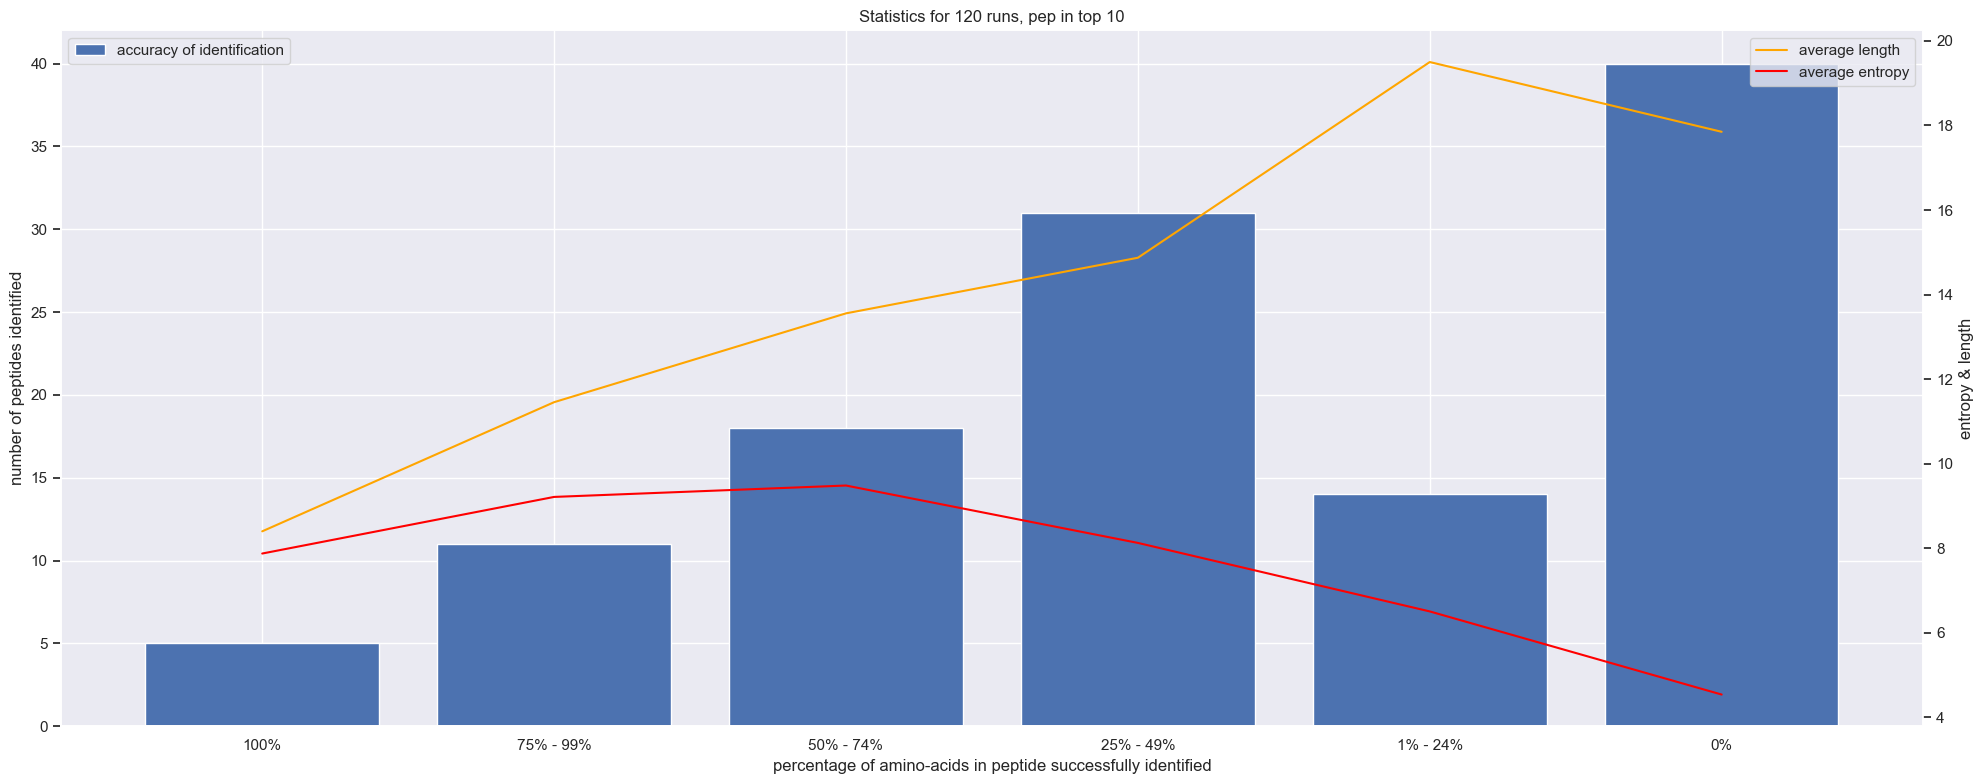

In [842]:
sns.set_theme(rc={'figure.figsize':(20,8)})
sns.set(font_scale=5)

fig, ax1 = plt.subplots()

ax1.bar(
    accuracy_dict.keys(),
    accuracy_dict.values(),
    0.8, label="accuracy of identification"
)

ax2 = ax1.twinx()
ax2.plot(
    interpret_dict.keys(),
    [interpret_dict[x]["avg_len"] for x in interpret_dict.keys()],
    color="orange", label="average length"
)
ax2.plot(
    interpret_dict.keys(),
    [interpret_dict[x]["avg_entropy"] for x in interpret_dict.keys()],
    color="red", label="average entropy"
)
plt.title(f"Statistics for 120 runs, pep in top {n_overlaps}")
ax1.set_xlabel("percentage of amino-acids in peptide successfully identified")
ax1.legend(loc="upper left")
ax1.set_ylabel("number of peptides identified")
ax2.grid(False)
ax2.legend(loc="upper right")
ax2.set_ylabel("entropy & length")
fig.tight_layout()
plt.show()
plt.show()

In [843]:
print("100%:",accuracy_dict["100%"]/sum(accuracy_dict.values())*100)
print("75% - 99%:", accuracy_dict["75% - 99%"]/sum(accuracy_dict.values())*100)
print("50% - 74%:", accuracy_dict["50% - 74%"]/sum(accuracy_dict.values())*100)
print("25% - 49%:", accuracy_dict["25% - 49%"]/sum(accuracy_dict.values())*100)
print("1% - 24%:", accuracy_dict["1% - 24%"]/sum(accuracy_dict.values())*100)
print("0%:", accuracy_dict["0%"]/sum(accuracy_dict.values())*100)

100%: 4.201680672268908
75% - 99%: 9.243697478991598
50% - 74%: 15.126050420168067
25% - 49%: 26.05042016806723
1% - 24%: 11.76470588235294
0%: 33.61344537815126


In [829]:
def avg_combined_p_for_n(accuracy_data):
    for percentile,data in zip(accuracy_data, accuracy_data.values()):
        print(percentile, np.round(np.mean([x["longest_overlap_p"] for x in data]),9))

In [830]:
avg_combined_p_for_n(accuracy_data)

100% 4.2e-08
75% - 99% 1.604e-06
50% - 74% 0.000833918
25% - 49% 0.023212459
1% - 24% 0.004253209


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (31,) + inhomogeneous part.

In [780]:
# 100% accuracy p_dist

plt.plot(
    accuracy_dict["100%"].keys(),
)

AttributeError: 'int' object has no attribute 'keys'

In [553]:
list_100 = [d["real_peptide"] for d in accuracy_data["100%"]]
list_100

['ADEGLSFR', 'ASLNMLR', 'EGLLLFK', 'LLEETLALK', 'LFTAESLLGLK']

# Look only at the Top peptide

In [689]:
accuracy_dict_top_1 = create_accuracy_dict(top_1_pep_stats)

In [690]:
accuracy_data_top_1 = collect_accuracy_data(top_1_pep_stats)

In [691]:
interpret_dict_top_1 = interpret_accuracy_data(accuracy_data_top_1)

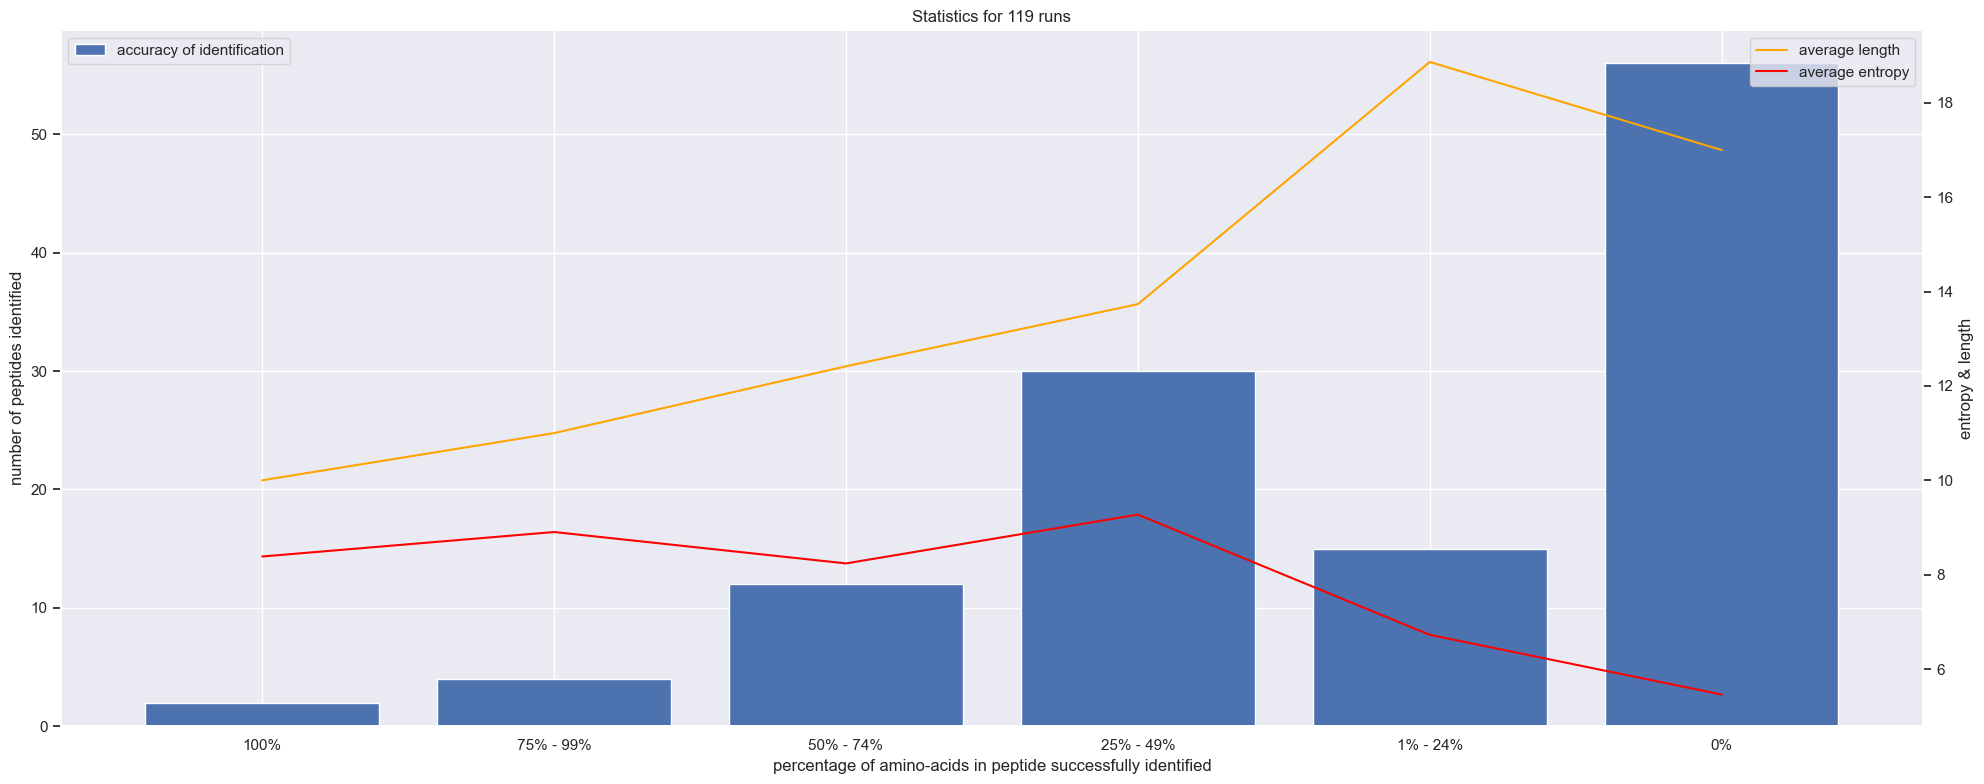

In [692]:
fig, ax1 = plt.subplots()

ax1.bar(
    accuracy_dict_top_1.keys(),
    accuracy_dict_top_1.values(),
    0.8, label="accuracy of identification"
)

ax2 = ax1.twinx()

ax2.plot(
    interpret_dict_top_1.keys(),
    [interpret_dict_top_1[x]["avg_len"] for x in interpret_dict_top_1.keys()],
    color="orange", label="average length"
)
ax2.plot(
    interpret_dict_top_1.keys(),
    [interpret_dict_top_1[x]["avg_entropy"] for x in interpret_dict_top_1.keys()],
    color="red", label="average entropy"
)
plt.title(f"Statistics for {len(multi_pep)} runs")
ax1.set_xlabel("percentage of amino-acids in peptide successfully identified")
ax1.legend(loc="upper left")
ax1.set_ylabel("number of peptides identified")
ax2.grid(False)
ax2.legend(loc="upper right")
ax2.set_ylabel("entropy & length")
fig.tight_layout()
plt.show()

In [693]:
# percentage of hits for how well the hits go
print("100%:",accuracy_dict_top_1["100%"]/sum(accuracy_dict_top_1.values())*100)
print("75% - 99%:", accuracy_dict_top_1["75% - 99%"]/sum(accuracy_dict_top_1.values())*100)
print("50% - 74%:", accuracy_dict_top_1["50% - 74%"]/sum(accuracy_dict_top_1.values())*100)
print("25% - 49%:", accuracy_dict_top_1["25% - 49%"]/sum(accuracy_dict_top_1.values())*100)
print("1% - 24%:", accuracy_dict_top_1["1% - 24%"]/sum(accuracy_dict_top_1.values())*100)
print("0%:", accuracy_dict_top_1["0%"]/sum(accuracy_dict_top_1.values())*100)

100%: 1.680672268907563
75% - 99%: 3.361344537815126
50% - 74%: 10.084033613445378
25% - 49%: 25.210084033613445
1% - 24%: 12.605042016806722
0%: 47.05882352941176


In [724]:
def avg_combined_p(accuracy_data):
    for percentile,data in zip(accuracy_data, accuracy_data.values()):
        print(percentile, np.round(np.mean([x["combined_p"] for x in data]),9))

In [896]:
[interpret_dict_top_1[x]["avg_len"] for x in interpret_dict_top_1.keys()]

[10.0, 11.0, 12.416666666666666, 13.733333333333333, 18.866666666666667, 17.0]

In [897]:
[interpret_dict_top_1[x]["avg_entropy"] for x in interpret_dict_top_1.keys()]

[8.384635370261329,
 8.90361511227622,
 8.237975722176397,
 9.272848974072131,
 6.723964626774429,
 5.458777550965111]

In [725]:
avg_combined_p(accuracy_data_top_1)

100% 3.4e-08
75% - 99% 1.232e-06
50% - 74% 7.69e-07
25% - 49% 4.778e-06
1% - 24% 0.00018162
0% 0.051023503


In [695]:
accuracy_data_top_1

{'100%': [{'entropy': 8.017153195788097,
   'overlaps': [['LLEETLALK']],
   'longest_overlap_pep': "['L', 'L', 'E', 'E', 'TL', 'AL', 'K']",
   'longest_overlap': ['LLEETLALK'],
   'longest_overlap_len': 9,
   'real_pep_len': 9,
   'real_peptide': 'LLEETLALK',
   'longest_overlap_perc': 1.0,
   'combined_p': 1.904126123013522e-08},
  {'entropy': 8.752117544734562,
   'overlaps': [['LFTAESLLGLK']],
   'longest_overlap_pep': "['LF', 'T', 'A', 'E', 'SL', 'L', 'GL', 'K']",
   'longest_overlap': ['LFTAESLLGLK'],
   'longest_overlap_len': 11,
   'real_pep_len': 11,
   'real_peptide': 'LFTAESLLGLK',
   'longest_overlap_perc': 1.0,
   'combined_p': 4.806771058158028e-08}],
 '75% - 99%': [{'entropy': 9.842203815367984,
   'overlaps': [['FQETMEAMR']],
   'longest_overlap_pep': "['F', 'Q', 'E', 'T', 'M', 'E', 'AM', 'R']",
   'longest_overlap': ['FQETMEAMR'],
   'longest_overlap_len': 9,
   'real_pep_len': 11,
   'real_peptide': 'DMFQETMEAMR',
   'longest_overlap_perc': 0.8181818181818182,
   'comb

In [726]:
emptyness_ratio = 0
avg_len = 0
fullness_ratio = 0

for peptide in [name["real_peptide"] for name in accuracy_data_top_1["0%"]]:
    if len(multi_pep[peptide]) == 0:
        emptyness_ratio += 1
    if len(multi_pep[peptide]) != 0:
        avg_len += len(multi_pep[peptide])
        fullness_ratio += 1



In [663]:
print("emptyness 0%:", emptyness_ratio/len([name["real_peptide"] for name in accuracy_data_top_1["0%"]])*100)
print("emptyness all %:",emptyness_ratio/sum(accuracy_dict_top_1.values())*100)

emptyness 0%: 0.0
emptyness all %: 0.0


In [664]:
emptyness_ratio/sum(accuracy_dict_top_1.values())*100

0.0

In [666]:
avg_len/fullness_ratio

1833.732142857143

In [609]:
100-69.64

30.36

In [656]:
emptyness_ratio = 0
avg_len = 0
fullness_ratio = 0

for peptide in [name["real_peptide"] for name in accuracy_data_top_1["100%"]]:
    if len(multi_pep[peptide]) == 0:
        emptyness_ratio += 1
    if len(multi_pep[peptide]) != 0:
        avg_len += len(multi_pep[peptide])
        fullness_ratio += 1

In [628]:
emptyness_ratio

0

In [652]:
example_plotting_dict = {
    "m/z array" : eval(m_df[m_df["Peptide"] == "AFMTADLPNELLELLEK"]["Spectrum"].values[1])["m/z array"],
    "intensity array" : eval(m_df[m_df["Peptide"] == "AFMTADLPNELLELLEK"]["Spectrum"].values[1])["intensity array"]

}

In [847]:
np.where(top_1_pep_stats["combined"])

SyntaxError: invalid syntax (1939364493.py, line 1)

In [868]:
for i in top_1_pep_stats.values():
    if i["longest_overlap_perc"] == 0:
        print(i)
        break

{'entropy': 12.646023223155513, 'overlaps': [[]], 'longest_overlap_pep': [], 'longest_overlap': [], 'longest_overlap_len': 0, 'real_pep_len': 17, 'real_peptide': 'AFMTADLPNELLELLEK', 'longest_overlap_perc': 0.0, 'combined_p': 1.021615411018194e-09}


In [875]:
multi_pep["LLEETLALK"]

,Unnamed: 0,index,sequence,peaks,len_pep,rank_sum,rank_p,SSE,mz_fid_p,combined_p,prob_of_outcome
0,0,464,"['L', 'L', 'E', 'E', 'TL', 'AL', 'K']","[1029.622364, 916.528687, 803.450745, 674.4090...",8,65,0.000871,0.000054,0.000001,1.904126e-08,2.381994e-10
1,1,462,"['L', 'L', 'E', 'E', 'TL', 'RR']","[1029.622364, 916.528687, 803.450745, 674.4090...",7,52,0.001051,0.000054,0.000001,2.277887e-08,2.849556e-10
2,2,408,"['L', 'L', 'EE', 'TL', 'AL', 'K']","[1029.622364, 916.528687, 803.450745, 545.3673...",7,56,0.002061,0.000053,0.000001,4.328115e-08,5.414319e-10
3,3,469,"['L', 'L', 'E', 'E', 'TL', 'A', 'L', 'K']","[1029.622364, 916.528687, 803.450745, 674.4090...",9,84,0.002151,0.000054,0.000001,4.507922e-08,5.639251e-10
4,4,468,"['L', 'L', 'E', 'E', 'TL', 'A', 'LK']","[1029.622364, 916.528687, 803.450745, 674.4090...",8,71,0.002621,0.000054,0.000001,5.441120e-08,6.806648e-10
...,...,...,...,...,...,...,...,...,...,...,...
995,995,878,"['A', 'RY', 'A', 'L', 'PD']","[np.float64(916.528687), 845.455566, 526.24902...",6,112,0.682851,0.004857,0.647341,8.028994e-01,1.004399e-02
996,996,866,"['A', 'RY', 'PE', 'G', 'L']","[np.float64(916.528687), 845.455566, 526.24902...",6,114,0.715071,0.004900,0.655511,8.239053e-01,1.030676e-02
997,997,140,"['AL', 'RY', 'A', 'PD', 'L']","[1029.622364, 845.455566, 526.249023, 455.2135...",6,106,0.578811,0.005950,0.823401,8.297929e-01,1.038041e-02
998,998,142,"['AL', 'RY', 'A', 'L', 'PD']","[1029.622364, 845.455566, 526.249023, 455.2135...",6,108,0.614331,0.005960,0.824601,8.510900e-01,1.064683e-02


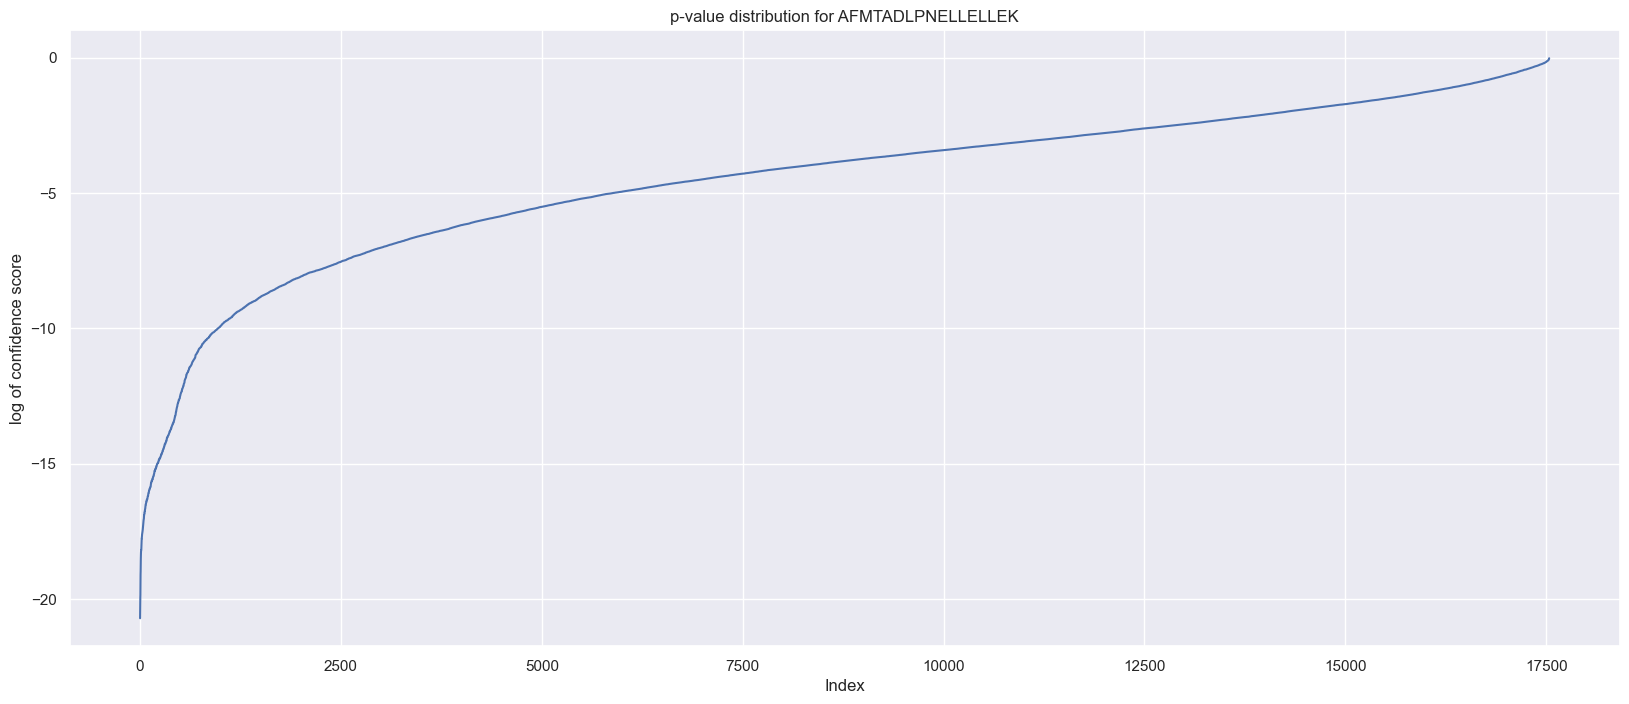

In [877]:
peptide = "AFMTADLPNELLELLEK"

plt.plot(
    multi_pep[peptide].index,
    np.log(multi_pep[peptide]["combined_p"]),
)
plt.xlabel("Index")
plt.ylabel("log of confidence score")
plt.title(f"p-value distribution for {peptide}")
plt.show()

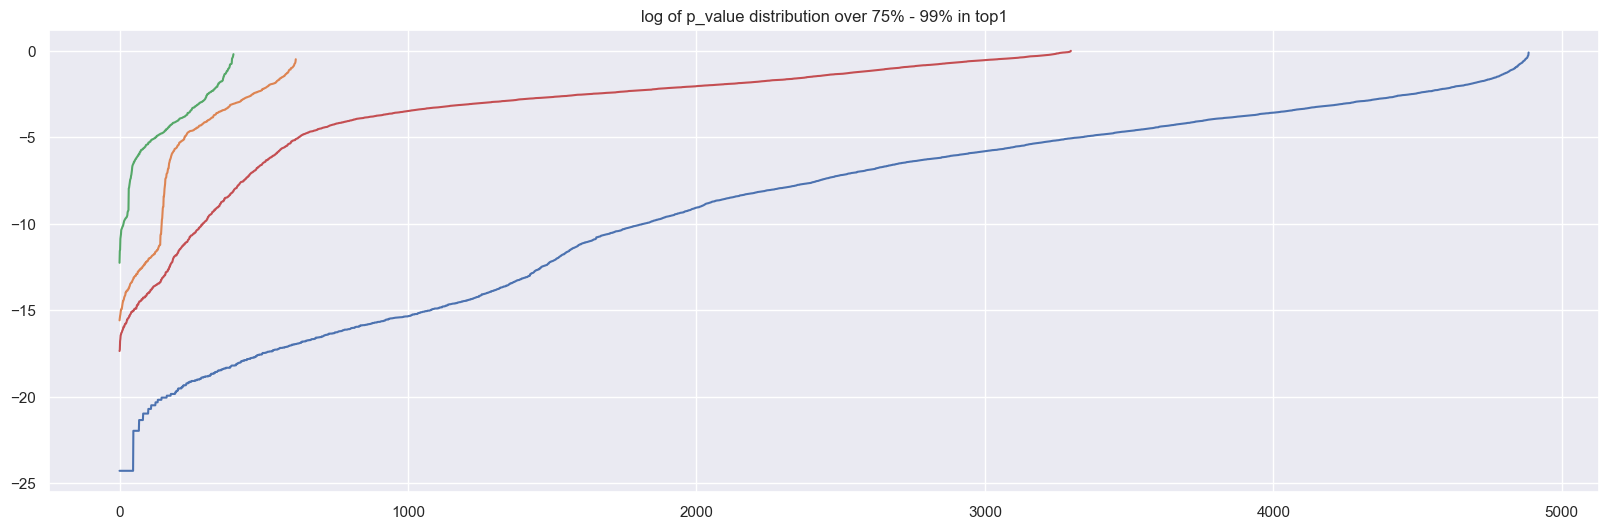

In [895]:
dist = "75% - 99%"
sns.set_theme(rc={'figure.figsize':(20,6)})
plt.title(f"log of p_value distribution over {dist} in top1")

for entry in accuracy_data_top_1[dist]:
    peptide = entry["real_peptide"]
    x = multi_pep[peptide].index
    y = np.log(multi_pep[peptide]["combined_p"])
    plt.plot(x,y)
plt.savefig(f"../graphs/p_dist_75_top1.png")

# Top or same p

In [765]:
def find_overlaps_in_top_or_same_p():
    print("yurp")
    for real_peptide, entry in zip(multi_pep,multi_pep.values()):
        top_n = entry["sequence"][0:20].values
        overlap_list = []
        combined_p = 0
        for sequence in top_n:
            # print(entry[entry["sequence"] == sequence]["combined_p"].values[0])
            if combined_p == 0:
                combined_p = entry[entry["sequence"] == sequence]["combined_p"].values[0]
            if entry[entry["sequence"] == sequence]["combined_p"].values[0] <= combined_p:
                found_peptide = "".join(eval(sequence))
                #print(found_peptide)
                # print(real_peptide)
                overlap = get_all_overlaps(real_peptide, found_peptide, min_len=3)
                overlap_list.append(overlap)
        joined_overlaps = ["".join(ind_overlaps) for ind_overlaps in overlap_list]
        longest_overlap = max(joined_overlaps,key=len)
        longest_overlap_index = joined_overlaps.index(longest_overlap)
        # print(overlap_list)
        longest_overlap_len = len("".join(overlap_list[longest_overlap_index]))
        #print((eval(top_n[longest_overlap_index])))
        #print(len(real_peptide))
        #print(real_peptide)len("".join(overlap_list[longest_overlap_index]))
        multi_pep_stats[real_peptide]["overlaps"] = overlap_list
        if longest_overlap_len > 0:
            multi_pep_stats[real_peptide]["longest_overlap_pep"] = (
                (eval(top_n[longest_overlap_index]))
            )
            multi_pep_stats[real_peptide]["longest_overlap"] = overlap_list[longest_overlap_index]
        elif longest_overlap_len == 0:
            multi_pep_stats[real_peptide]["longest_overlap_pep"] = []
            multi_pep_stats[real_peptide]["longest_overlap"] = []
        multi_pep_stats[real_peptide]["longest_overlap_len"] = longest_overlap_len
        multi_pep_stats[real_peptide]["real_pep_len"] = len(real_peptide)
        multi_pep_stats[real_peptide]["real_peptide"] = real_peptide
        multi_pep_stats[real_peptide]["longest_overlap_perc"] = longest_overlap_len/ len(real_peptide)
        multi_pep_stats[real_peptide]["combined_p"] = combined_p

In [766]:
find_overlaps_in_top_or_same_p()

yurp


In [767]:
multi_pep_stats

{'ADEGLSFR': {'entropy': 9.65755981533885,
  'overlaps': [['SFR'], ['ADE'], ['EGL']],
  'longest_overlap_pep': ['GE', 'E', 'AV', 'S', 'F', 'R'],
  'longest_overlap': ['SFR'],
  'longest_overlap_len': 3,
  'real_pep_len': 8,
  'real_peptide': 'ADEGLSFR',
  'longest_overlap_perc': 0.375,
  'combined_p': 2.8631021115928584e-11},
 'AFMTADLPNELLELLEK': {'entropy': 12.646023223155513,
  'overlaps': [[]],
  'longest_overlap_pep': [],
  'longest_overlap': [],
  'longest_overlap_len': 0,
  'real_pep_len': 17,
  'real_peptide': 'AFMTADLPNELLELLEK',
  'longest_overlap_perc': 0.0,
  'combined_p': 1.021615411018194e-09},
 'AFVHWYVGEGMEEGEFSEAR': {'entropy': 0.5188353218217512,
  'overlaps': [[], []],
  'longest_overlap_pep': [],
  'longest_overlap': [],
  'longest_overlap_len': 0,
  'real_pep_len': 20,
  'real_peptide': 'AFVHWYVGEGMEEGEFSEAR',
  'longest_overlap_perc': 0.0,
  'combined_p': 0.131641561139581},
 'AGKPVLCATQMLESMLK': {'entropy': 9.124673080115047,
  'overlaps': [[]],
  'longest_overla